# Background Simulator

Simulate the path from background objects to the camera.

In [1]:
import cupy as cp
import viz_cuda
import results
import simulation
from pyinstrument import Profiler
from pyinstrument.renderers import ConsoleRenderer

import numpy as np
np.set_printoptions(precision=6, linewidth=200)

profiler = Profiler()

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

results = results.BackgroundSimulationResult()
#simulator = simulation.Simulator(results, waves = 40, bundles = 10000000, bundle_size = 1)
#simulator = simulation.Simulator(results, waves = 80, bundles =  5000000, bundle_size = 1)
###simulator = simulation.BackgroundSimulator(results, waves =  80, bundles =  5000000, bundle_size = 1)
simulator = simulation.BackgroundSimulator(results, waves =  160, bundles =  5000000, bundle_size = 1)

/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')
/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


mempool.used_bytes 100263936


In [2]:
profiler.reset()
profiler.start()

#simulator.run()
simulator.run_all_waves()

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True)
print(profile_renderer.render(session))

  0%|          | 0/160 [00:00<?, ?it/s]

# Done


  _     ._   __/__   _ _  _  _ _/_   Recorded: 18:40:42  Samples:  17749
 /_//_/// /_\ / //_// / //_'/ //     Duration: 126.485   CPU time: 126.379
/   _/                      v4.2.0

Program: /home/joel/.local/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/joel/.local/share/jupyter/runtime/kernel-0bd04947-074e-4475-b4f4-7184e0f0c537.json

126.485 run_code  IPython/core/interactiveshell.py:3400
└─ 126.485 <module>  <ipython-input-2-9ea745b9c55a>:5
   └─ 126.485 run_all_waves  simulation.py:40
      └─ 126.191 run  simulation.py:109
         └─ 125.859 record_results  simulation.py:46
            ├─ 85.956 histogram  stats_cuda.py:51
            │  ├─ 46.046 histogram_4d  stats_cuda.py:300
            │  │  └─ 45.381 histogramdd  cupy/_statistics/histogram.py:285
            │  │     ├─ 35.867 [self]  
            │  │     └─ 8.926 bincount  cupy/_statistics/histogram.py:513
            │  │        └─ 8.912 [self]  
            │  ├─ 32.299 counter  stats_cuda.py:241
      

In [3]:
print(cp.sum(results._source_stage._histogram_4d_count._hist))

799999829.0


# <center> Source

total photons: 6.64e+13
photon bundle count: 8.00e+08
photon total energy (J): 2.44e-05
photon total power (W): 2.44e-02
luminous flux (lm): 8.13e+00


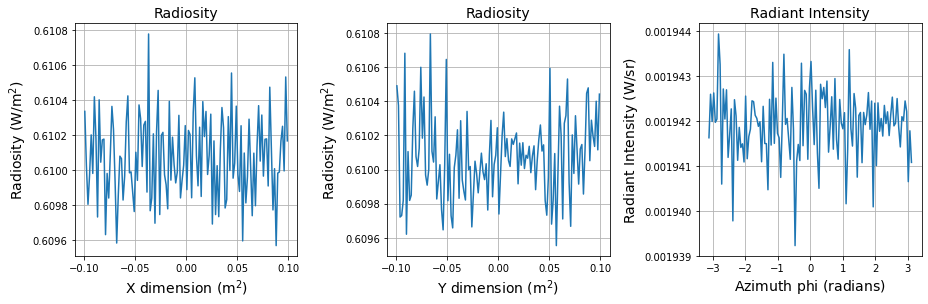

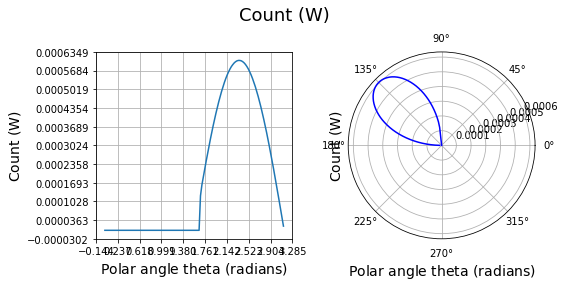

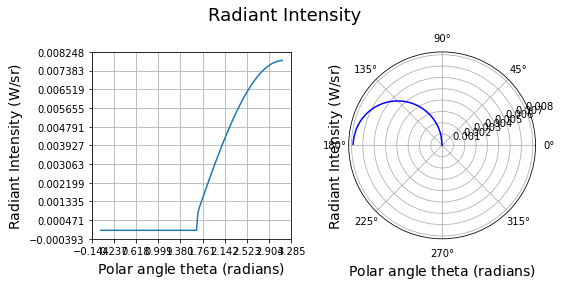

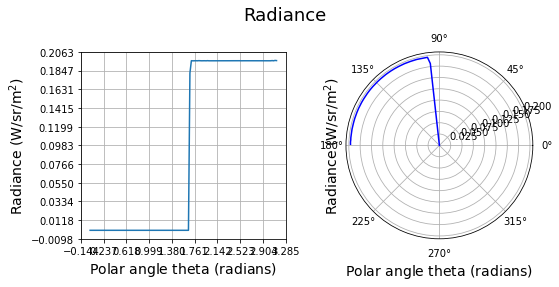

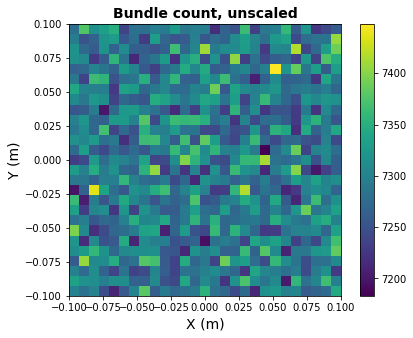

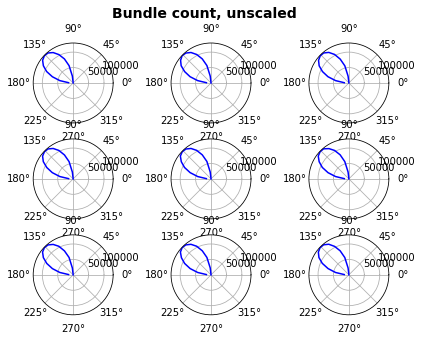

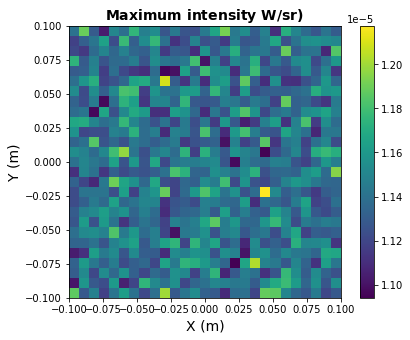

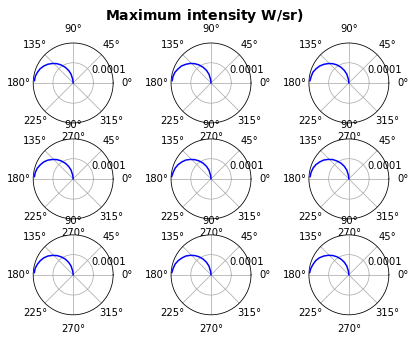

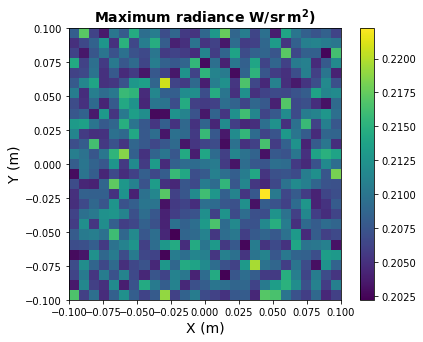

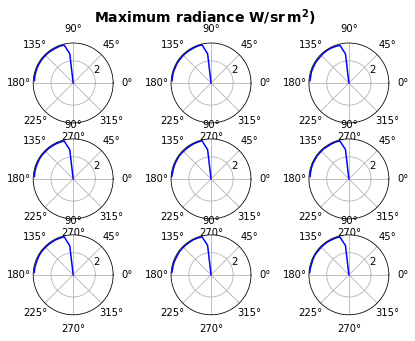

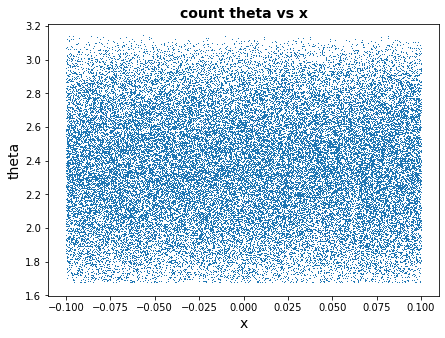

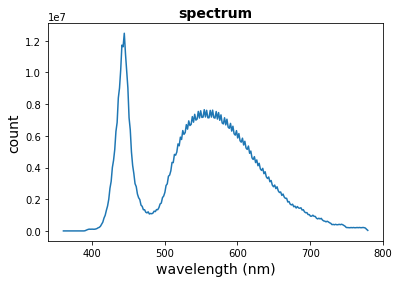

Output()

In [4]:
viz_cuda.summary(results._source_stage)
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stages_3d([results._source_stage])

# <center> Camera Plane

total photons: 9.01e+11
photon bundle count: 1.09e+07
photon total energy (J): 3.31e-07
photon total power (W): 3.31e-04
luminous flux (lm): 8.13e+00


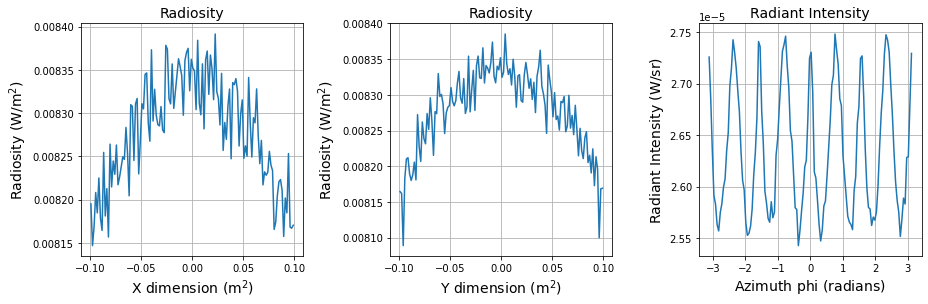

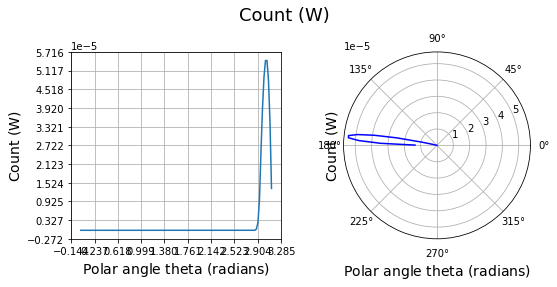

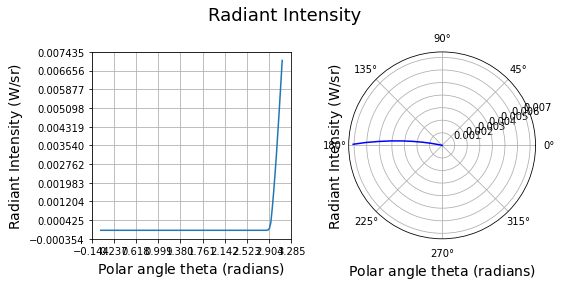

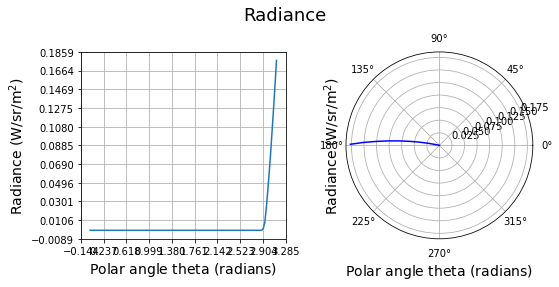

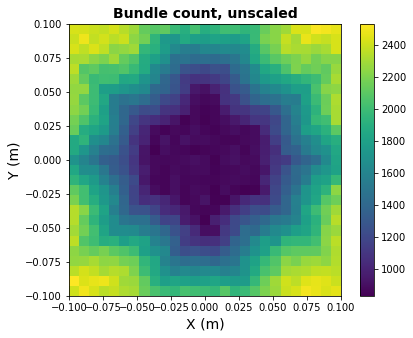

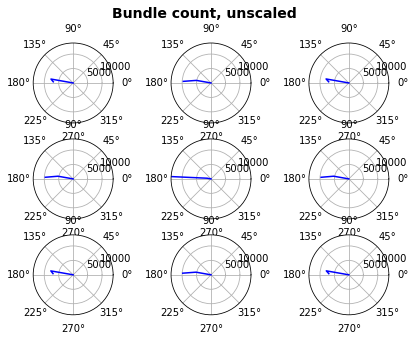

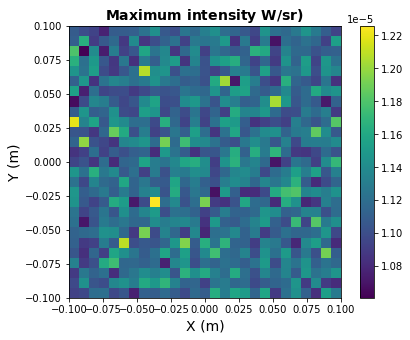

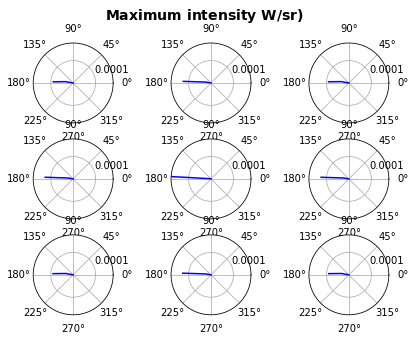

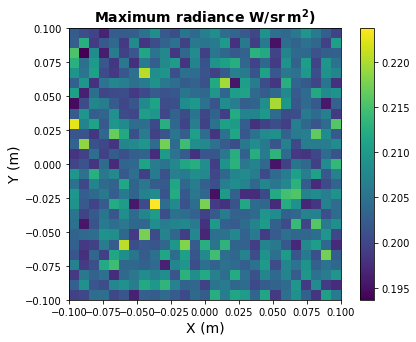

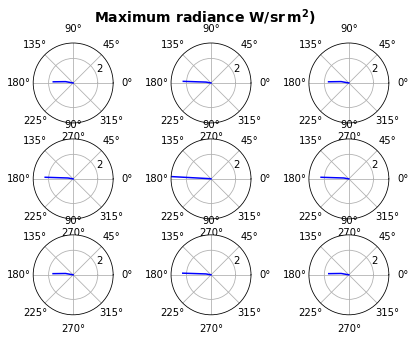

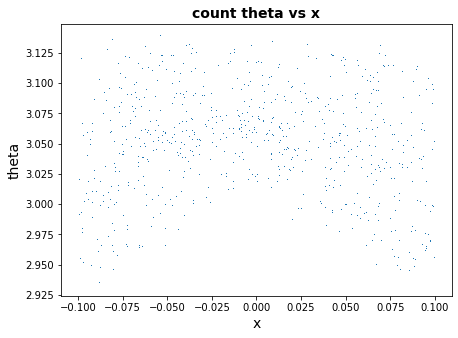

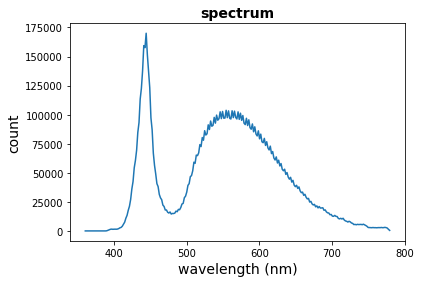

Output()

In [5]:
viz_cuda.summary(results._camera_plane_stage)
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stages_3d([results._camera_plane_stage])

total photons: 8.63e+10
photon bundle count: 1.04e+06
photon total energy (J): 2.55e-08
photon total power (W): 2.55e-05
luminous flux (lm): 8.13e+00


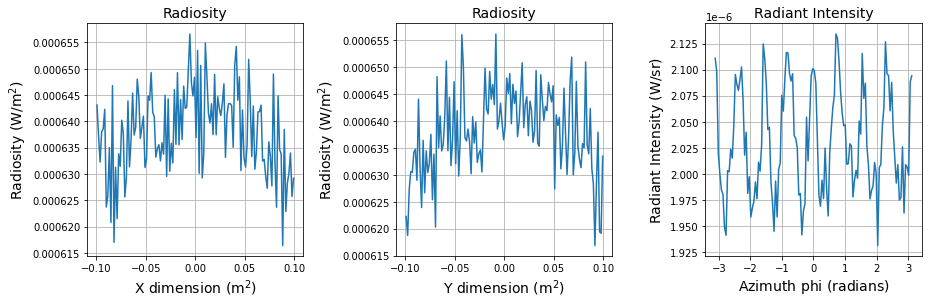

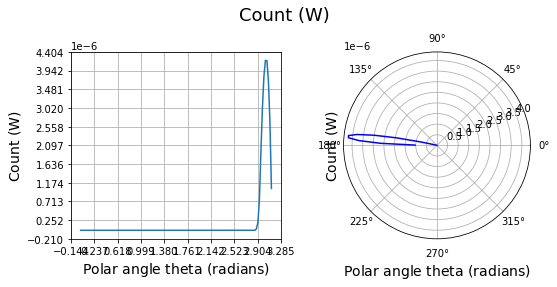

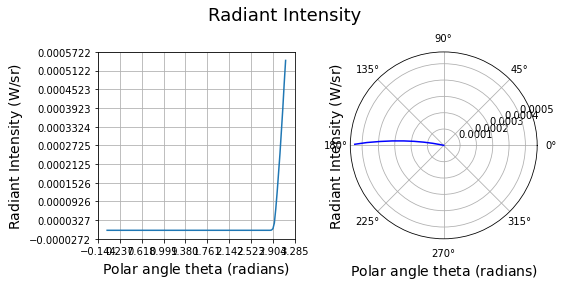

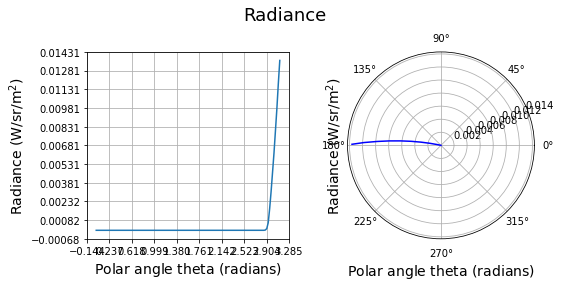

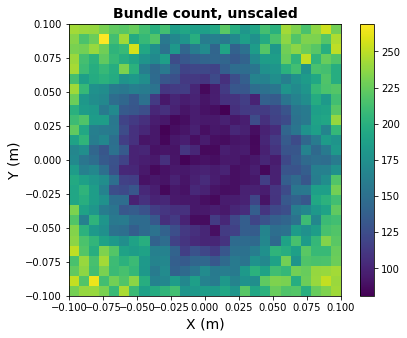

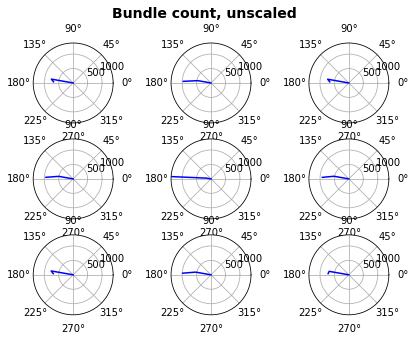

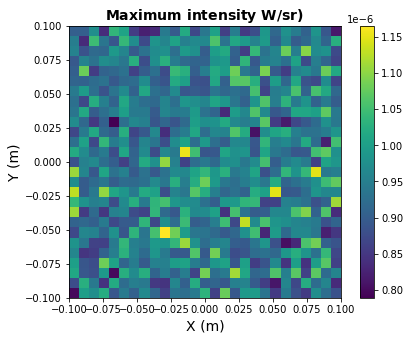

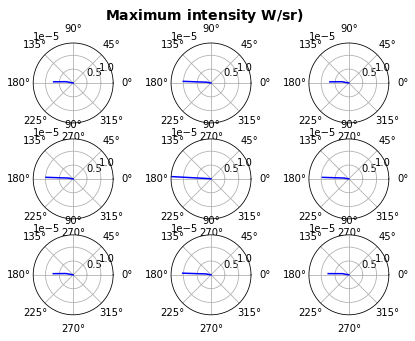

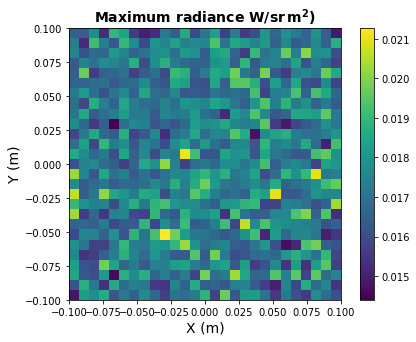

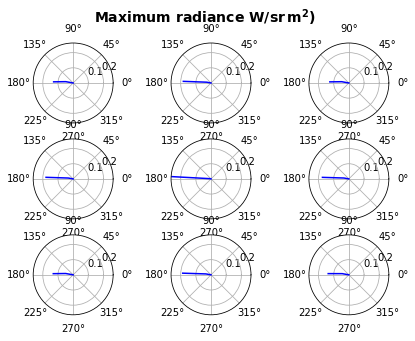

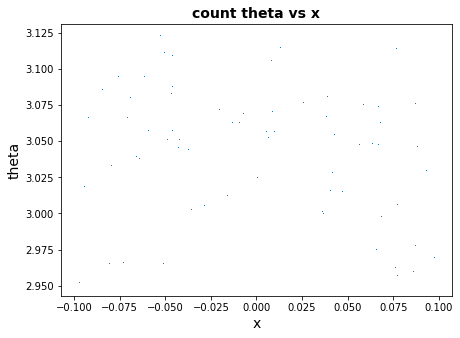

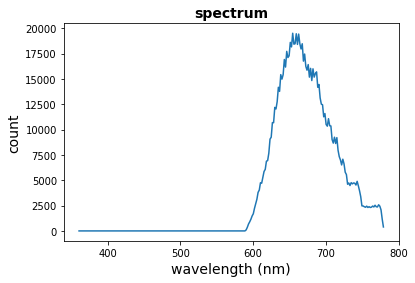

Output()

In [6]:
# after the filter
viz_cuda.summary(results._filter_stage)
viz_cuda.plot_all_histograms(results._filter_stage)
viz_cuda.plot_stages_3d([results._filter_stage])

total photons: 2.18e+08
photon bundle count: 2.63e+03
photon total energy (J): 6.44e-11
photon total power (W): 6.44e-08
luminous flux (lm): 8.13e+00


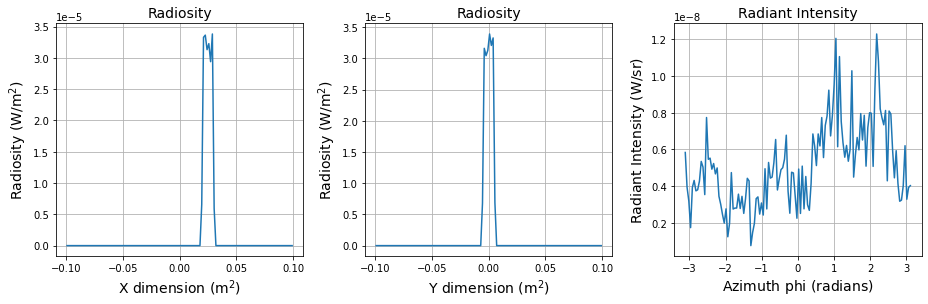

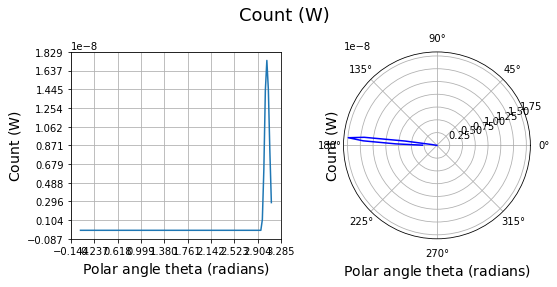

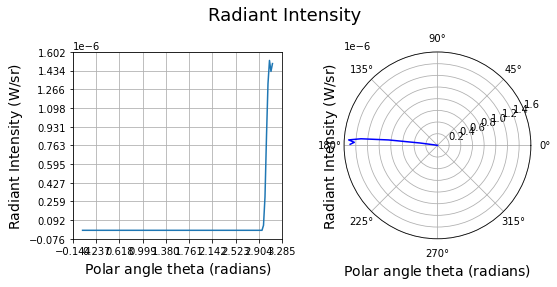

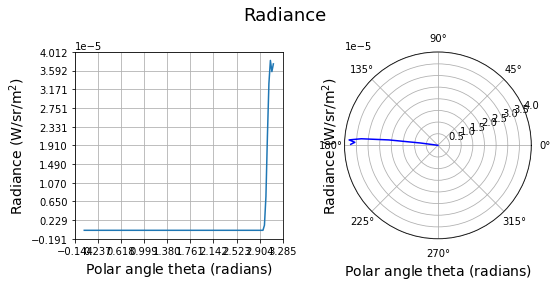

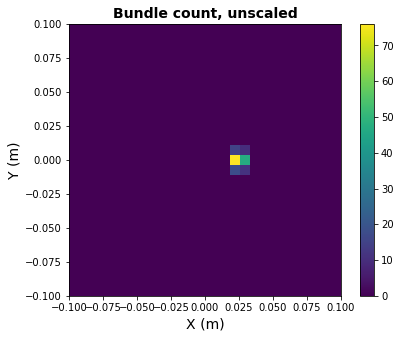

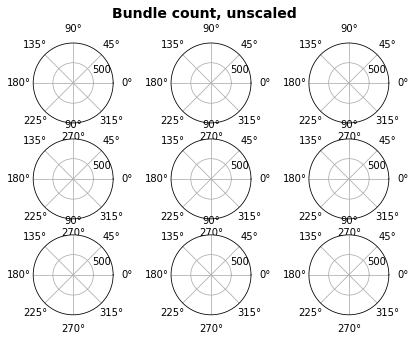

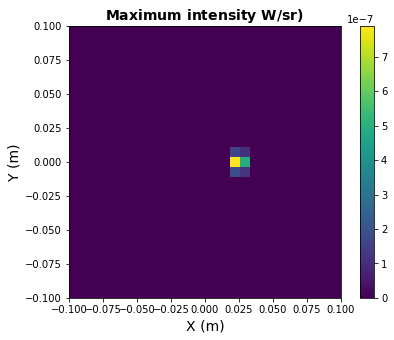

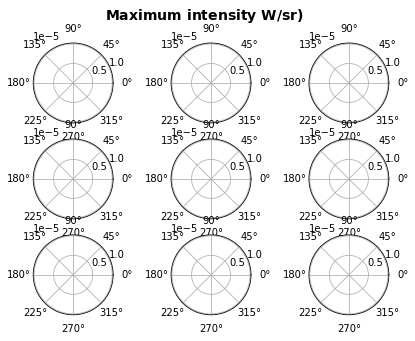

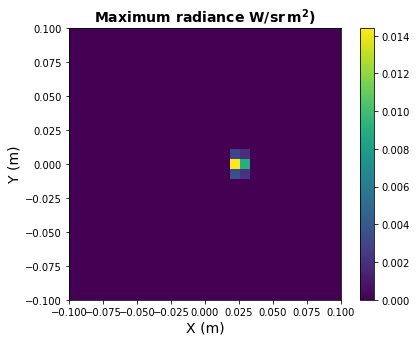

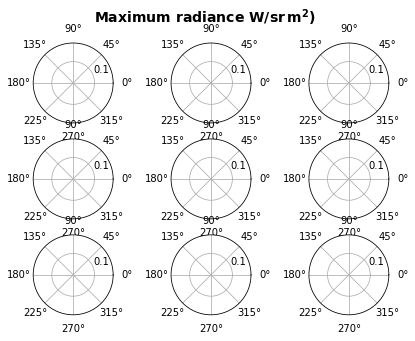

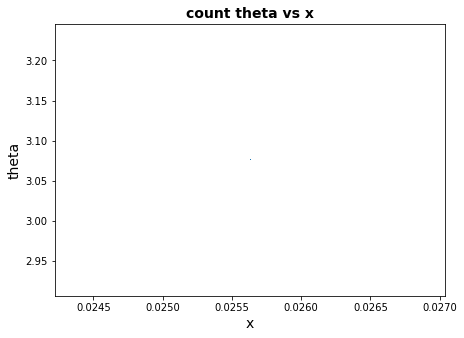

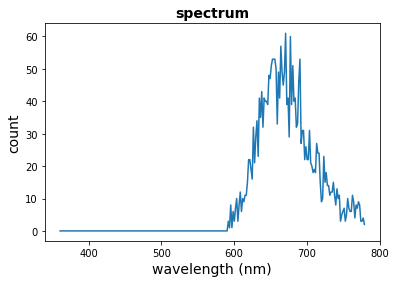

Output()

In [7]:
# same as the camera dimensions
viz_cuda.summary(results._camera_lens_stage)
viz_cuda.plot_all_histograms(results._camera_lens_stage)
viz_cuda.plot_stages_3d([results._camera_lens_stage])

In [8]:
viz_cuda.plot_stages_3d([results._source_stage, results._camera_plane_stage])

Output()

In [10]:
print(f"camera total {simulator._camera._total_electrons:.3e}")

camera total 1.974e+08
